In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

In [4]:
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')
data = pd.read_csv('data-podcast-list.tsv', parse_dates=['date'], date_parser=dateparse, sep='\t')
data.head()

/tmp/ipykernel_313259/1734079020.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/home/boris/Загрузки/data-podcast-list.tsv', parse_dates=['date'], date_parser=dateparse, sep='\t')


,date,listening
0,2024-02-01,1
1,2024-02-02,2
2,2024-02-03,1
3,2024-02-04,3
4,2024-02-05,3


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

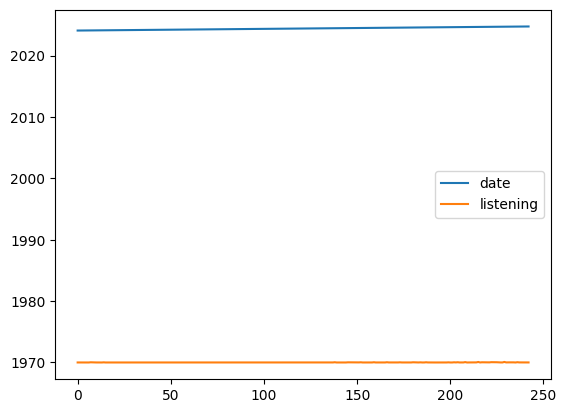

In [6]:
data.plot()
plt.show()

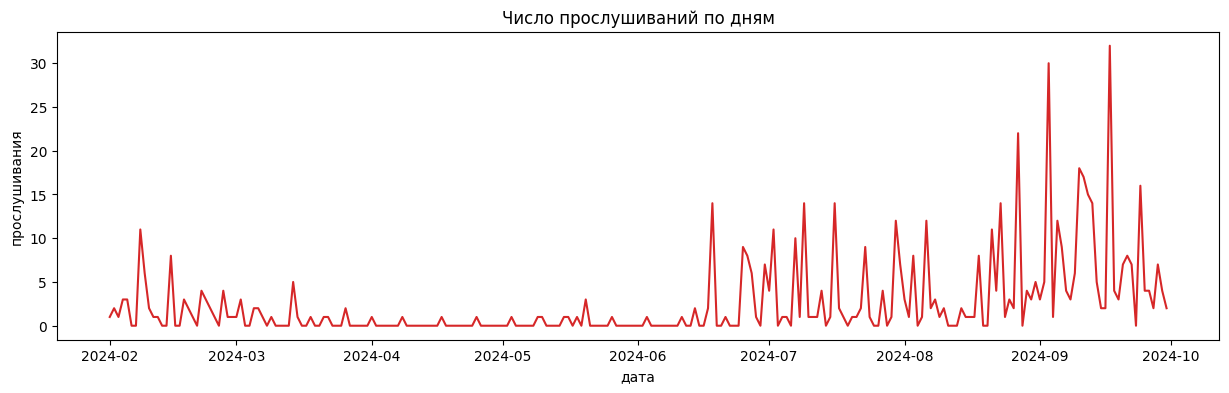

In [11]:
def plot_df(df, x, y, title="", xlabel='дата', ylabel='прослушивания', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(data, x=data['date'], y=data['listening'], title='Число прослушиваний по дням')

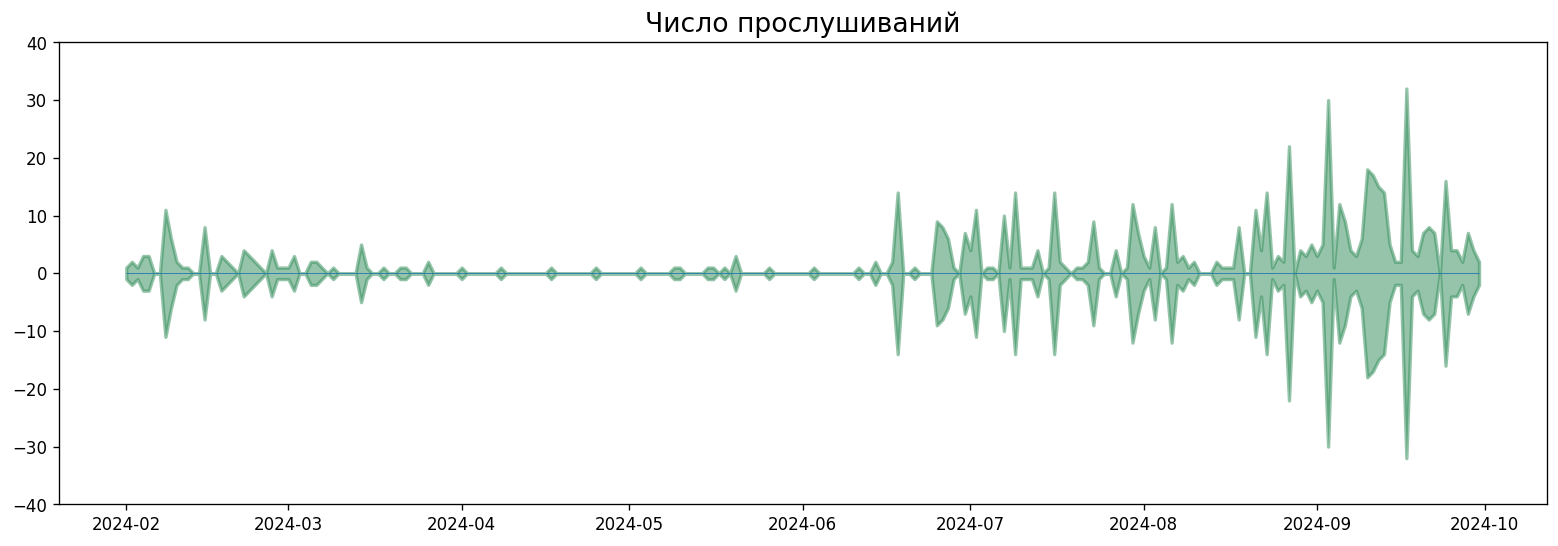

In [20]:
x = data['date'].values
y1 = data['listening'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-40, 40)
plt.title('Число прослушиваний', fontsize=16)
plt.hlines(y=0, xmin=np.min(data['date']), xmax=np.max(data['date']), linewidth=.5)
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

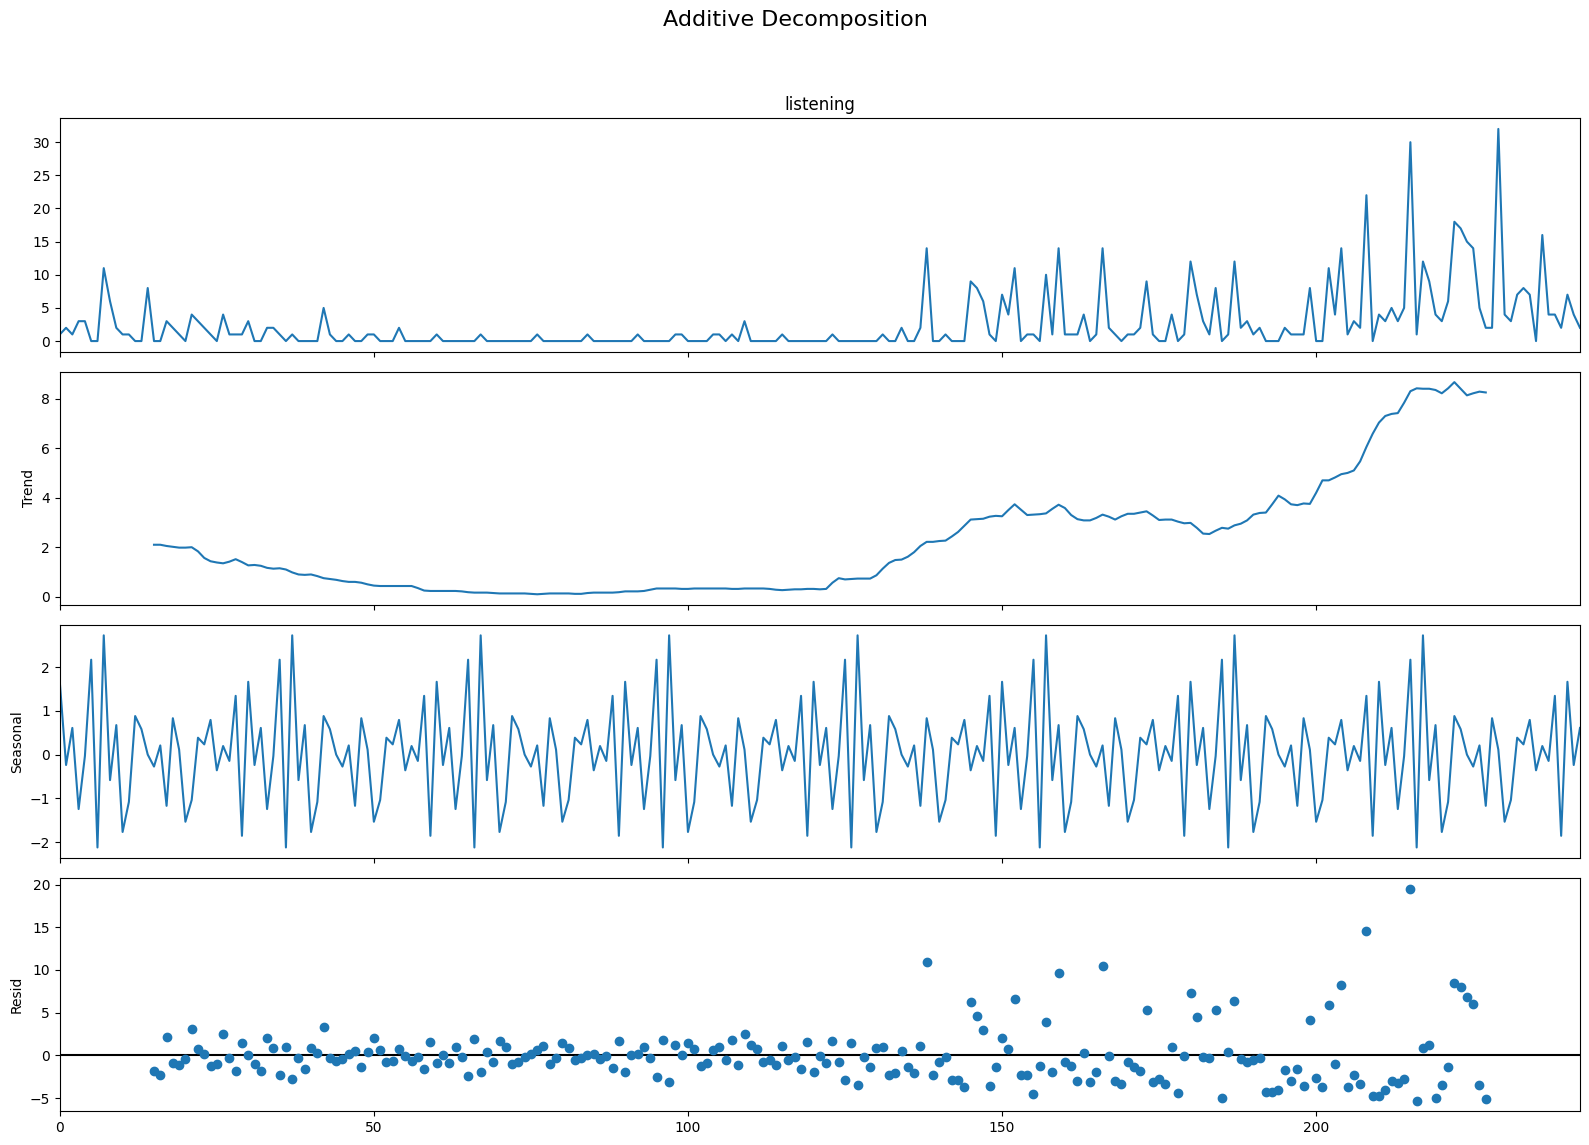

In [19]:
# Multiplicative Decomposition 
# multiplicative_decomposition = seasonal_decompose(data['listening'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['listening'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [28]:
df = pd.read_csv('podcast-list2.csv')
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")
df.head()

,date,listening,published_dates
0,2024-02-01,1,1
1,2024-02-02,2,0
2,2024-02-03,1,0
3,2024-02-04,3,0
4,2024-02-05,3,0


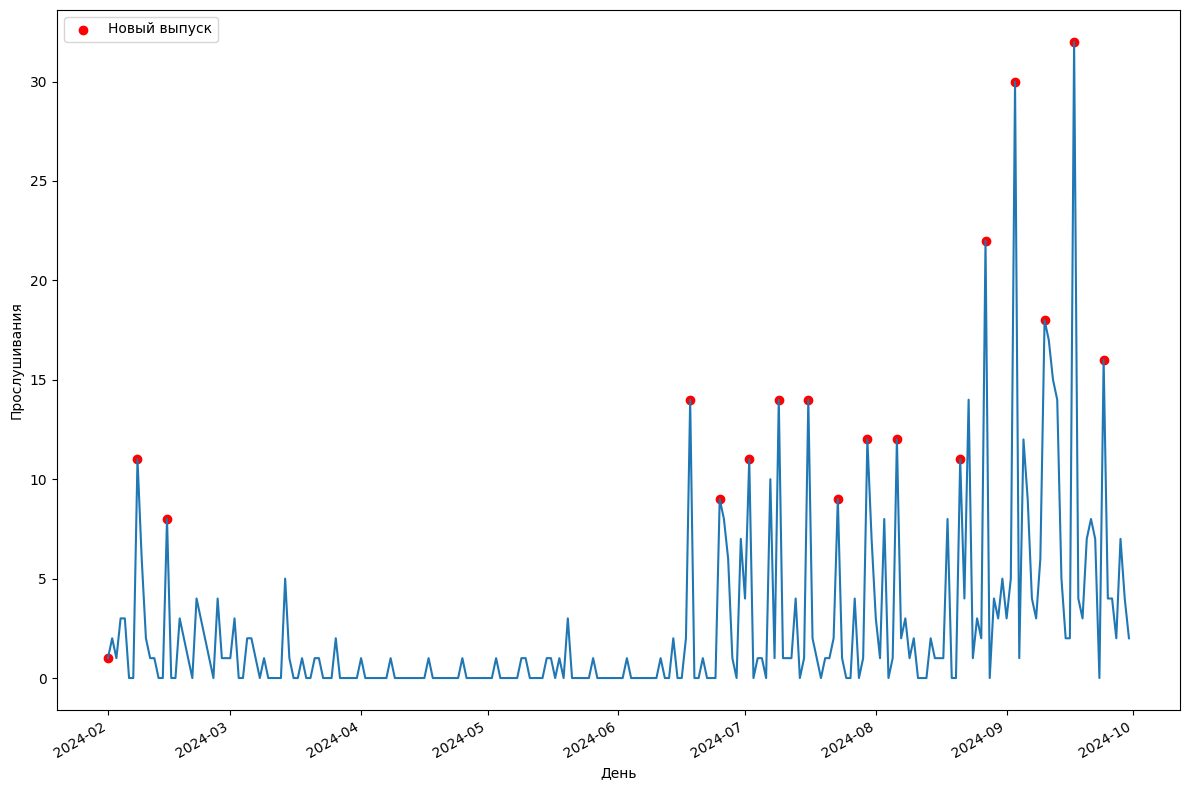

In [30]:
published_dates = df[df['published_dates'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['date'], df['listening'])
ax.scatter(published_dates['date'], published_dates['listening'], marker='o', color='red', label='Новый выпуск')
ax.set_xlabel('День')
ax.set_ylabel('Прослушивания')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()